In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df_train= pd.read_csv("../data/processed/train_w_desc.csv")
df_test= pd.read_csv("../data/processed/test_w_desc.csv")
train_rdkfp= pd.read_csv("../data/processed/train_rdkfp.csv")
test_rdkfp= pd.read_csv("../data/processed/test_rdkfp.csv")

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [4]:
df_train.head()

,Drug_ID,Drug,Y,mol,tpsa,mol_w,qed,HBA,HBD,logP,MR
0,Drug 0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,0,<rdkit.Chem.rdchem.Mol object at 0x00000201534...,45.20,319.096508,0.434358,0,0,2.6669,70.4260
1,Drug 2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,0,<rdkit.Chem.rdchem.Mol object at 0x00000201534...,20.31,291.071785,0.581359,2,0,4.9890,87.3330
2,Drug 5,CCOP(=O)(Nc1cccc(Cl)c1)OCC,0,<rdkit.Chem.rdchem.Mol object at 0x00000201531...,47.56,263.047808,0.790087,3,1,3.9330,65.9332
3,Drug 6,O=C(O)c1ccccc1O,0,<rdkit.Chem.rdchem.Mol object at 0x00000201531...,57.53,138.031694,0.610259,3,2,1.0904,35.0661
4,Drug 8,O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...,0,<rdkit.Chem.rdchem.Mol object at 0x00000201531...,172.56,397.962705,0.374691,10,0,4.1188,91.2156


In [5]:
X_train= df_train[["tpsa","mol_w","qed","HBA","HBD","logP","MR"]]
y_train= df_train["Y"]
X_test= df_test[["tpsa","mol_w","qed","HBA","HBD","logP","MR"]]
y_test= df_test["Y"]

In [6]:
joined_train= X_train.join(train_rdkfp)
joined_test= X_test.join(test_rdkfp)

In [7]:
joined_train.head()

,tpsa,mol_w,qed,HBA,HBD,logP,MR,Bit_0,Bit_1,Bit_2,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,45.20,319.096508,0.434358,0,0,2.6669,70.4260,0,0,0,...,0,0,0,0,1,0,1,1,1,0
1,20.31,291.071785,0.581359,2,0,4.9890,87.3330,0,1,0,...,1,0,1,1,0,0,0,1,1,1
2,47.56,263.047808,0.790087,3,1,3.9330,65.9332,0,1,1,...,1,1,1,0,0,1,0,1,1,0
3,57.53,138.031694,0.610259,3,2,1.0904,35.0661,0,0,1,...,0,1,0,0,0,1,0,0,1,0
4,172.56,397.962705,0.374691,10,0,4.1188,91.2156,0,0,0,...,0,0,0,1,0,1,1,1,1,0


In [8]:
scaler= MinMaxScaler()

In [9]:
X_train_scaled= scaler.fit_transform(joined_train)
X_test_scaled= scaler.fit_transform(joined_test)

In [10]:
X_train_scaled.shape

(28789, 2055)

In [11]:
X_test_scaled.shape

(8225, 2055)

In [12]:
lg= LogisticRegression()

In [13]:
lg.fit(X_train_scaled, y_train)

c:\Users\Andreu\anaconda3\envs\ml_project_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
lg_preds= lg.predict(X_test_scaled)

In [15]:
cmat_lg = confusion_matrix(y_test, lg_preds)

In [16]:
cmat_lg

array([[7771,  157],
       [ 203,   94]], dtype=int64)

In [17]:
print("Recall:", recall_score(y_test, lg_preds))
print("f1_score:", f1_score(y_test, lg_preds))
print("roc_auc:", roc_auc_score(y_test, lg_preds))

Recall: 0.3164983164983165
f1_score: 0.3430656934306569
roc_auc: 0.6483475437183813


In [18]:
#The best recall with Logistic Regression using Morgan fingerprints was 0.26, 
# so there is a light improvement

In [19]:
train_maccs= pd.read_csv("../data/processed/train_maccs.csv")
test_maccs= pd.read_csv("../data/processed/test_maccs.csv")

In [23]:
joined_train_maccs= X_train.join(train_maccs)
joined_test_maccs= X_test.join(test_maccs)

In [26]:
joined_train_maccs.head()

,tpsa,mol_w,qed,HBA,HBD,logP,MR,Bit_0,Bit_1,Bit_2,...,Bit_157,Bit_158,Bit_159,Bit_160,Bit_161,Bit_162,Bit_163,Bit_164,Bit_165,Bit_166
0,45.20,319.096508,0.434358,0,0,2.6669,70.4260,0,0,0,...,0,0,1,1,0,0,1,1,1,0
1,20.31,291.071785,0.581359,2,0,4.9890,87.3330,0,0,0,...,0,1,0,1,1,1,1,1,1,0
2,47.56,263.047808,0.790087,3,1,3.9330,65.9332,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,57.53,138.031694,0.610259,3,2,1.0904,35.0661,0,0,0,...,1,0,1,0,0,1,1,1,1,0
4,172.56,397.962705,0.374691,10,0,4.1188,91.2156,0,0,0,...,0,1,1,0,1,1,1,1,1,0


In [24]:
X_train_scaled_maccs= scaler.fit_transform(joined_train_maccs)
X_test_scaled_maccs= scaler.fit_transform(joined_test_maccs)

In [25]:
lg2= LogisticRegression()

In [28]:
lg2.fit(X_train_scaled_maccs, y_train)

c:\Users\Andreu\anaconda3\envs\ml_project_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
lg_preds2= lg2.predict(X_test_scaled_maccs)

In [31]:
cmat_lg2 = confusion_matrix(y_test, lg_preds2)

In [32]:
cmat_lg2

array([[7906,   22],
       [ 254,   43]], dtype=int64)

In [33]:
print("Recall:", recall_score(y_test, lg_preds2))
print("f1_score:", f1_score(y_test, lg_preds2))
print("roc_auc:", roc_auc_score(y_test, lg_preds2))

Recall: 0.1447811447811448
f1_score: 0.23756906077348067
roc_auc: 0.5710030850040941


In [ ]:
#MACCS encoding doesn't work well with LogReg

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
score_list= []
for i in range(1,40, 2):
    knn_ex = KNeighborsClassifier(n_neighbors=i)
    knn_ex.fit(X_train_scaled, y_train)
    knn_y= knn_ex.predict(X_test_scaled) 
    score_list.append(roc_auc_score(y_test,knn_y))

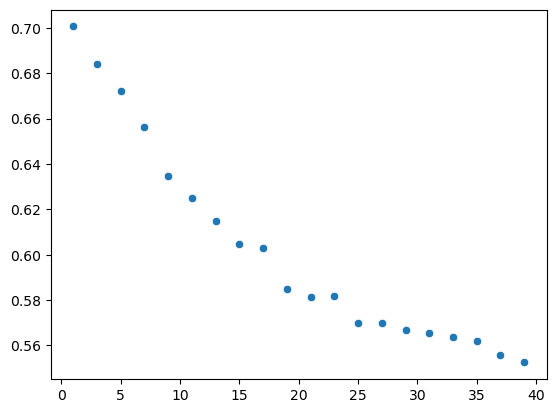

In [36]:
plt.figure()
sns.scatterplot(x= range(1,40,2), y= score_list)
plt.show()

In [37]:
knn_3 = KNeighborsClassifier(n_neighbors=3)

In [38]:
knn_3.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
knn_preds= knn_3.predict(X_test_scaled)

In [41]:
cmat_knn = confusion_matrix(y_test, knn_preds)

In [42]:
cmat_knn

array([[7854,   74],
       [ 185,  112]], dtype=int64)

In [43]:
print("Recall:", recall_score(y_test, knn_preds))
print("f1_score:", f1_score(y_test, knn_preds))
print("roc_auc:", roc_auc_score(y_test, knn_preds))

Recall: 0.3771043771043771
f1_score: 0.46376811594202905
roc_auc: 0.6838851855249434


In [45]:
knn_preds_prob= knn_3.predict_proba(X_test_scaled)

In [46]:
knn_preds_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
#In order to improve the results, first I am going to merge train and valid data, 
# which will expand the training data

In [21]:
df_valid= pd.read_csv("../data/processed/valid_w_desc.csv")
valid_rdkfp= pd.read_csv("../data/processed/valid_rdkfp.csv")

In [23]:
df_valid.head()

,Drug_ID,Drug,Y,mol,tpsa,mol_w,qed,HBA,HBD,logP,MR
0,Drug 7835,Cc1c2ccnc(C#N)c2c(C)c2c1[nH]c1ccccc12,0,<rdkit.Chem.rdchem.Mol object at 0x000002014FB...,52.47,271.110947,0.516388,2,1,4.35782,85.2947
1,Drug 35410,CN(C)c1ccc(C(Cc2ccccc2)C2NC(=S)NC2=O)cc1,0,<rdkit.Chem.rdchem.Mol object at 0x000002014FB...,44.37,339.140533,0.821580,3,2,2.45180,101.3204
2,Drug 34952,CC(C)=CCOc1cc(O)c2c(O)c3c(cc2c1)CC(C)(C)CC3=O,0,<rdkit.Chem.rdchem.Mol object at 0x000002014FB...,66.76,340.167459,0.791283,4,2,4.75110,98.6361
3,Drug 36154,O=c1onc2c3ccccc3ncn12,0,<rdkit.Chem.rdchem.Mol object at 0x000002014FB...,60.40,187.038176,0.522737,5,0,0.83570,49.0290
4,Drug 35825,COc1ccccc1-c1n[nH]c(-c2ccccc2O)n1,0,<rdkit.Chem.rdchem.Mol object at 0x000002014FB...,71.03,267.100777,0.765102,4,2,2.85290,75.4715


In [24]:
train_full= df_train.join(train_rdkfp)

In [25]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28789 entries, 0 to 28788
Columns: 2059 entries, Drug_ID to Bit_2047
dtypes: float64(5), int64(2051), object(3)
memory usage: 452.2+ MB


In [26]:
valid_full= df_valid.join(valid_rdkfp)

In [27]:
valid_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Columns: 2059 entries, Drug_ID to Bit_2047
dtypes: float64(5), int64(2051), object(3)
memory usage: 64.6+ MB


In [29]:
train_set = pd.concat([train_full, valid_full])

In [30]:
train_set.head()

,Drug_ID,Drug,Y,mol,tpsa,mol_w,qed,HBA,HBD,logP,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,Drug 0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,0,<rdkit.Chem.rdchem.Mol object at 0x00000201534...,45.20,319.096508,0.434358,0,0,2.6669,...,0,0,0,0,1,0,1,1,1,0
1,Drug 2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,0,<rdkit.Chem.rdchem.Mol object at 0x00000201534...,20.31,291.071785,0.581359,2,0,4.9890,...,1,0,1,1,0,0,0,1,1,1
2,Drug 5,CCOP(=O)(Nc1cccc(Cl)c1)OCC,0,<rdkit.Chem.rdchem.Mol object at 0x00000201531...,47.56,263.047808,0.790087,3,1,3.9330,...,1,1,1,0,0,1,0,1,1,0
3,Drug 6,O=C(O)c1ccccc1O,0,<rdkit.Chem.rdchem.Mol object at 0x00000201531...,57.53,138.031694,0.610259,3,2,1.0904,...,0,1,0,0,0,1,0,0,1,0
4,Drug 8,O=[N+]([O-])c1ccc(SSc2ccc([N+](=O)[O-])cc2[N+]...,0,<rdkit.Chem.rdchem.Mol object at 0x00000201531...,172.56,397.962705,0.374691,10,0,4.1188,...,0,0,0,1,0,1,1,1,1,0


In [31]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32902 entries, 0 to 4112
Columns: 2059 entries, Drug_ID to Bit_2047
dtypes: float64(5), int64(2051), object(3)
memory usage: 517.1+ MB


In [32]:
X_train_set= train_set.drop(columns=["Drug_ID", "Drug", "mol", "Y"])
y_train_set= train_set["Y"]

In [33]:
X_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32902 entries, 0 to 4112
Columns: 2055 entries, tpsa to Bit_2047
dtypes: float64(5), int64(2050)
memory usage: 516.1 MB


In [34]:
y_train_set.info()

<class 'pandas.core.series.Series'>
Int64Index: 32902 entries, 0 to 4112
Series name: Y
Non-Null Count  Dtype
--------------  -----
32902 non-null  int64
dtypes: int64(1)
memory usage: 514.1 KB


In [35]:
scaler= MinMaxScaler()

In [36]:
X_train_set_scaled= scaler.fit_transform(X_train_set)

In [37]:
X_train_set_scaled.shape

(32902, 2055)

In [38]:
lg3= LogisticRegression()
lg3.fit(X_train_set_scaled, y_train_set)

c:\Users\Andreu\anaconda3\envs\ml_project_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
lg3_preds= lg3.predict(X_test_scaled)

In [40]:
cmat_lg3 = confusion_matrix(y_test, lg3_preds)
cmat_lg3

array([[7826,  102],
       [ 206,   91]], dtype=int64)

In [41]:
print("Recall:", recall_score(y_test, lg3_preds))
print("f1_score:", f1_score(y_test, lg3_preds))
print("roc_auc:", roc_auc_score(y_test, lg3_preds))

Recall: 0.3063973063973064
f1_score: 0.3714285714285715
roc_auc: 0.646765757134072


In [ ]:
#Combining both train and validation datasets into a single training set, did not improve the 
#TP value, but it decreased the number of FP.

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
LogisticRegression??

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Source:        
class LogisticRegression(LinearClassifierMixin, SparseCoefMixin, BaseEstimator):
    """
    Logistic Regression (aka logit, MaxEnt) classifier.

    In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
    scheme if the 'multi_class' option is set to 'ovr', and uses the
    cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
    (Currently the 'multinomial' option is supported only by the 'lbfgs',
    'sag', 'saga' and 'newton-cg' solvers.)

    This class implements regularized logistic regression using the
    'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
    that reg

In [44]:
param_grid_lr = {                      
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    #'C': [0.01, 0.1, 1],   
    'class_weight': ['balanced']                                    
}

In [45]:
from sklearn.model_selection import StratifiedKFold

In [125]:
kfold= StratifiedKFold(5)

In [49]:
lr = LogisticRegression()

grid = GridSearchCV(estimator = lr,
                  param_grid = param_grid_lr,
                  n_jobs=-1,
                  cv = kfold)

In [48]:
X_train_set_scaled.shape

(32902, 2055)

In [50]:
grid.fit(X_train_set_scaled, y_train_set)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [51]:
grid.best_estimator_

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [54]:
best_preds= grid.best_estimator_.predict(X_test_scaled)

In [55]:
def evaluate(test, pred):
    cmat = confusion_matrix(test, pred)
    print(cmat)
    print("Recall:", recall_score(test, pred))
    print("f1_score:", f1_score(test, pred))
    print("roc_auc:", roc_auc_score(test, pred))

In [56]:
evaluate(y_test, best_preds)

[[7077  851]
 [ 135  162]]
Recall: 0.5454545454545454
f1_score: 0.24732824427480915
roc_auc: 0.7190567379139529


In [57]:
#balancing the method yielded too many FP

In [63]:
class_weight= {0: 1, 1: 5}

In [64]:
lg4 = LogisticRegression(solver='newton-cg', class_weight=class_weight)

In [65]:
lg4.fit(X_train_set_scaled, y_train_set)

LogisticRegression(class_weight={0: 1, 1: 5}, solver='newton-cg')

In [66]:
lg4_preds= lg4.predict(X_test_scaled)

In [67]:
evaluate(y_test, lg4_preds)

[[7531  397]
 [ 162  135]]
Recall: 0.45454545454545453
f1_score: 0.3256936067551267
roc_auc: 0.7022348867076414


In [68]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
poly = PolynomialFeatures(degree = 2)
X_poly_2 = poly.fit_transform(X_train_set_scaled)

MemoryError: Unable to allocate 518. GiB for an array with shape (32902, 2114596) and data type float64

In [ ]:
train_set.to_csv("../data/processed/train_set.csv", index=False)#to work on google colab
test_set= df_test.join(test_rdkfp)
test_set.to_csv("../data/processed/test_set.csv", index=False)

Polynomial features crashes both in hard disk and google colab. Too big for the RAM

In [78]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [80]:
dt.fit(X_train_set_scaled, y_train_set)

DecisionTreeClassifier()

In [81]:
dt_preds= dt.predict(X_test_scaled)

In [82]:
evaluate(y_test, dt_preds)

[[7513  415]
 [ 198   99]]
Recall: 0.3333333333333333
f1_score: 0.24414303329223178
roc_auc: 0.6404936091490078


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
rnd_clf = RandomForestClassifier(n_estimators=3,
                                 max_features=2)

In [87]:
rnd_clf.fit(X_train_set_scaled, y_train_set)

RandomForestClassifier(max_features=2, n_estimators=3)

In [88]:
rnd_preds= rnd_clf.predict(X_test_scaled)

In [89]:
evaluate(y_test, rnd_preds)

[[7873   55]
 [ 225   72]]
Recall: 0.24242424242424243
f1_score: 0.339622641509434
roc_auc: 0.6177434027459254


In [91]:
class_weight

{0: 1, 1: 5}

In [92]:
rf = RandomForestClassifier(n_estimators= 200)

In [93]:
rf.fit(X_train_set_scaled, y_train_set)

RandomForestClassifier(n_estimators=200)

In [94]:
rf_preds= rf.predict(X_test_scaled)

In [95]:
evaluate(y_test, rf_preds)

[[7913   15]
 [ 229   68]]
Recall: 0.22895622895622897
f1_score: 0.35789473684210527
roc_auc: 0.6135321003509703


In [96]:
rf2 = RandomForestClassifier(n_estimators=200,
                            class_weight=class_weight)

In [97]:
rf2.fit(X_train_set_scaled, y_train_set)

RandomForestClassifier(class_weight={0: 1, 1: 5}, n_estimators=200)

In [98]:
rf2_preds = rf2.predict(X_test_scaled)

In [99]:
evaluate(y_test, rf2_preds)

[[7913   15]
 [ 227   70]]
Recall: 0.2356902356902357
f1_score: 0.36649214659685864
roc_auc: 0.6168991037179735


In [102]:
rf3 = RandomForestClassifier(n_estimators=200,
                            max_features=2,
                            class_weight="balanced")

In [103]:
rf3.fit(X_train_set_scaled, y_train_set)

RandomForestClassifier(class_weight='balanced', max_features=2,
                       n_estimators=200)

In [105]:
rf3_preds= rf3.predict(X_test_scaled)

In [106]:
evaluate(y_test, rf3_preds)

[[7918   10]
 [ 237   60]]
Recall: 0.20202020202020202
f1_score: 0.32697547683923706
roc_auc: 0.6003794249253381


In [107]:
rf4= RandomForestClassifier(n_estimators=200,
                            class_weight="balanced")

In [108]:
rf4.fit(X_train_set_scaled, y_train_set)

RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [109]:
rf4_preds= rf4.predict(X_test_scaled)

In [110]:
evaluate(y_test, rf4_preds)

[[7915   13]
 [ 231   66]]
Recall: 0.2222222222222222
f1_score: 0.351063829787234
roc_auc: 0.6102912322009194


In [116]:
rf5= RandomForestClassifier(n_estimators=100,
                            class_weight={0: 1, 1: 100})

In [117]:
rf5.fit(X_train_set_scaled, y_train_set)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [118]:
rf5_preds= rf5.predict(X_test_scaled)

In [119]:
evaluate(y_test, rf5_preds)

[[7915   13]
 [ 235   62]]
Recall: 0.20875420875420875
f1_score: 0.33333333333333337
roc_auc: 0.6035572254669126


In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
score_list= []
for i in range(1,20, 2):
    knn_ex = KNeighborsClassifier(n_neighbors=i)
    knn_ex.fit(X_train_set_scaled, y_train_set)
    knn_y= knn_ex.predict(X_test_scaled) 
    score_list.append(roc_auc_score(y_test,knn_y))

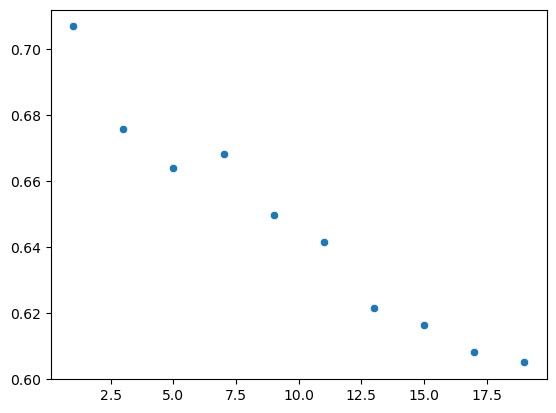

In [122]:
plt.figure()
sns.scatterplot(x= range(1,20,2), y= score_list)
plt.show()

In [127]:
param_grid_knn = {"n_neighbors": [1,3,5,7],
                "weights": ["uniform", "distance"],
                "algorithm": ["ball_tree", "kd_tree"]}           

In [130]:
knn_1 = KNeighborsClassifier(1)

In [131]:
knn_1.fit(X_train_set_scaled,y_train_set)

KNeighborsClassifier(n_neighbors=1)

In [132]:
knn1_preds= knn_1.predict(X_test_scaled)

In [133]:
evaluate(y_test, knn1_preds)

[[7763  165]
 [ 168  129]]
Recall: 0.43434343434343436
f1_score: 0.43654822335025373
roc_auc: 0.7067655617731298


In [134]:
knn_3 = KNeighborsClassifier(3)

In [135]:
knn_3.fit(X_train_set_scaled,y_train_set)

KNeighborsClassifier(n_neighbors=3)

In [136]:
knn3_preds= knn_3.predict(X_test_scaled)

In [137]:
evaluate(y_test, knn3_preds)

[[7856   72]
 [ 190  107]]
Recall: 0.3602693602693603
f1_score: 0.4495798319327731
roc_auc: 0.6755938123243875


In [138]:
knn_1_2 = KNeighborsClassifier(1, weights="distance")

In [139]:
knn_1_2.fit(X_train_set_scaled,y_train_set)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [140]:
knn1_2_preds= knn_1_2.predict(X_test_scaled)

In [141]:
evaluate(y_test, knn1_2_preds)

[[7763  165]
 [ 168  129]]
Recall: 0.43434343434343436
f1_score: 0.43654822335025373
roc_auc: 0.7067655617731298


In [142]:
from sklearn.svm import SVC

In [143]:
svc = SVC(kernel="linear", C= 1)

In [144]:
svc.fit(X_train_set_scaled,y_train_set)
svc_preds= svc.predict(X_test_scaled)

KeyboardInterrupt: 

In [ ]:
evaluate(y_test, svc_preds)

In [145]:
from sklearn.ensemble import AdaBoostClassifier

In [148]:
ada = AdaBoostClassifier(lg3, n_estimators=100)

ada.fit(X_train_set_scaled, y_train_set)

ada_preds = ada.predict(X_test_scaled)

In [149]:
evaluate(y_test, ada_preds)

[[7866   62]
 [ 224   73]]
Recall: 0.24579124579124578
f1_score: 0.33796296296296297
roc_auc: 0.6189854311700931


In [150]:
ada_lg4 = AdaBoostClassifier(lg4, n_estimators=100)

ada_lg4.fit(X_train_set_scaled, y_train_set)

ada_preds_lg4 = ada_lg4.predict(X_test_scaled)

In [151]:
evaluate(y_test, ada_preds_lg4)

[[7643  285]
 [ 171  126]]
Recall: 0.42424242424242425
f1_score: 0.35593220338983056
roc_auc: 0.6941469437054705


In [153]:
import pickle

In [154]:
with open("../model/ada_lg_model.pkl", "wb") as save_file:
    pickle.dump(ada_lg4, save_file)

In [155]:
ada_knn1 = AdaBoostClassifier(knn_1, n_estimators=100)

ada_knn1.fit(X_train_set_scaled, y_train_set)

ada_knn1 = ada_knn1.predict(X_test_scaled)

ValueError: KNeighborsClassifier doesn't support sample_weight.

# GradientBoosting

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

In [157]:
GradientBoostingClassifier??

Init signature:
GradientBoostingClassifier(
    *,
    loss='deviance',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Source:        
class GradientBoostingClassifier(ClassifierMixin, BaseGradientBoosting):
    """Gradient Boosting for classification.

    GB builds an additive model in a
    forward stage-wise fashion; it allows for the optimization of
    arbitrary differentiable loss functions. In each stage ``n_classes_``
    regression trees are fit on the negative gradient of the
    binomial or multinomial deviance loss function. Binary classification
    is a special case where only a singl

In [159]:
gb = GradientBoostingClassifier(n_estimators=100)
gb.fit(X_train_set_scaled, y_train_set)

gb_preds = gb.predict(X_test_scaled)

In [161]:
evaluate(y_test, gb_preds)

[[7908   20]
 [ 244   53]]
Recall: 0.17845117845117844
f1_score: 0.2864864864864865
roc_auc: 0.5879642370560635


# XGBoosting

In [162]:
from xgboost import XGBClassifier

In [164]:
xgb = XGBClassifier()
xgb.fit(X_train_set_scaled, y_train_set)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [166]:
xgb_preds = xgb.predict(X_test_scaled)

In [167]:
evaluate(y_test, xgb_preds)

[[7903   25]
 [ 204   93]]
Recall: 0.31313131313131315
f1_score: 0.4481927710843373
roc_auc: 0.6549889663537495


In [168]:
xgb2 = XGBClassifier(n_estimators=200)

In [169]:
xgb2.fit(X_train_set_scaled, y_train_set)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [170]:
xgb2_preds = xgb2.predict(X_test_scaled)

In [171]:
evaluate(y_test, xgb2_preds)

[[7895   33]
 [ 203   94]]
Recall: 0.3164983164983165
f1_score: 0.4433962264150943
roc_auc: 0.6561679271694408


In [172]:
from xgboost import XGBRFClassifier

In [173]:
XGBClassifier??

Init signature:
XGBClassifier(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic',
    use_label_encoder: Optional[bool] = None,
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid values are 

In [174]:
xgbrf = XGBRFClassifier(n_estimators=100)

xgbrf.fit(X_train_set_scaled, y_train_set)
xgbrf_preds = xgbrf.predict(X_test_scaled)

In [175]:
evaluate(y_test, xgbrf_preds)

[[7915   13]
 [ 264   33]]
Recall: 0.1111111111111111
f1_score: 0.1924198250728863
roc_auc: 0.5547356766453638


In [176]:
from sklearn.ensemble import VotingClassifier

In [177]:
estimators = [("Logistic Regression",  lg3), ("Ada", ada_lg4), ("knn", knn_1)]

In [178]:
voting_clf = VotingClassifier(estimators=estimators, voting="hard")

In [179]:
voting_clf.fit(X_train_set_scaled, y_train_set)

c:\Users\Andreu\anaconda3\envs\ml_project_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('Ada',
                              AdaBoostClassifier(base_estimator=LogisticRegression(class_weight={0: 1,
                                                                                                 1: 5},
                                                                                   solver='newton-cg'),
                                                 n_estimators=100)),
                             ('knn', KNeighborsClassifier(n_neighbors=1))])

In [180]:
voting_preds= voting_clf.predict(X_test_scaled)

In [181]:
evaluate(y_test, voting_preds)

[[7815  113]
 [ 187  110]]
Recall: 0.37037037037037035
f1_score: 0.423076923076923
roc_auc: 0.6780585454273647


In [182]:
voting_soft = VotingClassifier(estimators=estimators, voting="soft")

In [183]:
voting_soft.fit(X_train_set_scaled, y_train_set)

c:\Users\Andreu\anaconda3\envs\ml_project_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('Ada',
                              AdaBoostClassifier(base_estimator=LogisticRegression(class_weight={0: 1,
                                                                                                 1: 5},
                                                                                   solver='newton-cg'),
                                                 n_estimators=100)),
                             ('knn', KNeighborsClassifier(n_neighbors=1))],
                 voting='soft')

In [186]:
voting_soft_preds= voting_soft.predict(X_test_scaled)

In [187]:
evaluate(y_test, voting_soft_preds)

[[7808  120]
 [ 175  122]]
Recall: 0.4107744107744108
f1_score: 0.45269016697588127
roc_auc: 0.697819092370051


In [188]:
estimators2 = [("Logistic Regression",  lg3), ("xgb", xgb), ("Ada", ada_lg4), ("knn", knn_1)]

In [189]:
voting_clf_2 = VotingClassifier(estimators=estimators2, voting="hard")

In [195]:
voting_clf_2.fit(X_train_set_scaled, y_train_set)

c:\Users\Andreu\anaconda3\envs\ml_project_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,...
                                            max_delta_step=0, max_depth=6,
                                            max_leaves=0, min_child_weight=1,
                     

In [196]:
voting_2_preds= voting_clf_2.predict(X_test_scaled)

In [197]:
evaluate(y_test, voting_2_preds)

[[7899   29]
 [ 203   94]]
Recall: 0.3164983164983165
f1_score: 0.44761904761904764
roc_auc: 0.656420197603346


In [198]:
voting_soft_2 = VotingClassifier(estimators=estimators2, voting="soft")

In [199]:
voting_soft_2.fit(X_train_set_scaled, y_train_set)

c:\Users\Andreu\anaconda3\envs\ml_project_env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,...
                                            max_delta_step=0, max_depth=6,
                                            max_leaves=0, min_child_weight=1,
                     

In [200]:
voting_soft2_preds= voting_soft_2.predict(X_test_scaled)

In [201]:
evaluate(y_test, voting_soft2_preds)

[[7883   45]
 [ 194  103]]
Recall: 0.3468013468013468
f1_score: 0.4629213483146067
roc_auc: 0.6705626310192406
